In [ ]:
import numpy as np
import yfinance as yf
# Download Apple Ticker Data
data = yf.download('AAPL', start='2009-04-01', end='2010-01-01', interval='1d')
print(len(data.index))
for i in range(4, len(data.index), int(len(data.index)/10)):
    data.iloc[i] = np.nan
data.to_csv('AAPL_2009-2010_6m_RAW_1d.csv')

# 1. Libraries & Sample Data
The first step is to load our Python Libraries and download the sample data. The dataset represents Apple stock price (1d bars) for the year 2010

In [1]:
# Load Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from IPython.display import display, HTML
# for dataframe display
pd.set_option("display.max_rows", None)
def display_df(df):
    # Puts the scrollbar next to the DataFrame
    display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" + df.to_html() + "</div>"))

In [2]:
# Download Sample Data
data = pd.read_csv('AAPL_2009-2010_6m_RAW_1d.csv')

# 2. Exploratory Data Analysis
Next, we want to analyze our data. Display the data as a dataframe, and plot some relevant data so you can get an idea of what our dataset looks like.

In [3]:
# Display as Dataframe
display_df(data)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-04-01,3.717500,3.892857,3.710357,3.881786,3.281867,5.893720e+08
1,2009-04-02,3.933571,4.098214,3.920714,4.025357,3.403249,8.123668e+08
2,2009-04-03,4.078214,4.147500,4.054286,4.142500,3.502286,6.362412e+08
3,2009-04-06,4.105000,4.241071,4.045714,4.230357,3.576569,6.580644e+08
4,2009-04-07,NaN,NaN,NaN,NaN,NaN,NaN
5,2009-04-08,4.122500,4.171071,4.092143,4.154286,3.512252,4.556300e+08
6,2009-04-09,4.229286,4.285714,4.212857,4.270357,3.610385,5.307568e+08
7,2009-04-13,4.286071,4.320714,4.250000,4.293571,3.630010,3.892364e+08
8,2009-04-14,4.270357,4.291786,4.187500,4.225357,3.572339,4.546220e+08
9,2009-04-15,4.185714,4.223214,4.134286,4.201429,3.552110,4.128824e+08


In [4]:
# Index data by Date
data.set_index('Date', inplace=True)
display_df(data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-04-01,3.717500,3.892857,3.710357,3.881786,3.281867,5.893720e+08
2009-04-02,3.933571,4.098214,3.920714,4.025357,3.403249,8.123668e+08
2009-04-03,4.078214,4.147500,4.054286,4.142500,3.502286,6.362412e+08
2009-04-06,4.105000,4.241071,4.045714,4.230357,3.576569,6.580644e+08
2009-04-07,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-08,4.122500,4.171071,4.092143,4.154286,3.512252,4.556300e+08
2009-04-09,4.229286,4.285714,4.212857,4.270357,3.610385,5.307568e+08
2009-04-13,4.286071,4.320714,4.250000,4.293571,3.630010,3.892364e+08
2009-04-14,4.270357,4.291786,4.187500,4.225357,3.572339,4.546220e+08


<Axes: xlabel='Date'>

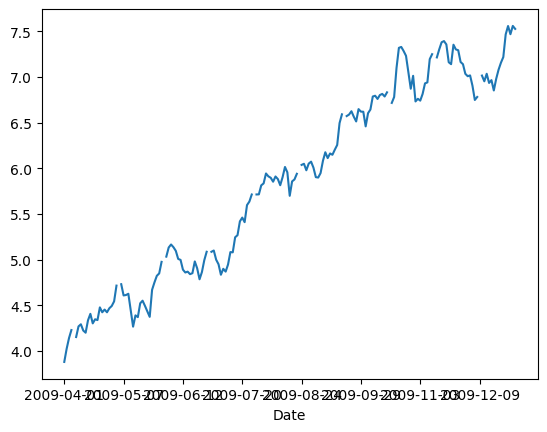

In [5]:
# Plot the Close Data
data['Close'].plot()

# 3. Data Cleaning
Next, we need to clean our data for training our model. This requires removal of NaN values.

In [6]:
# Check for null values
print('Number of Null Values =', data.isnull().sum())

Number of Null Values = Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64


In [7]:
# forward fill missing values
data=data.ffill()
display_df(data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-04-01,3.717500,3.892857,3.710357,3.881786,3.281867,5.893720e+08
2009-04-02,3.933571,4.098214,3.920714,4.025357,3.403249,8.123668e+08
2009-04-03,4.078214,4.147500,4.054286,4.142500,3.502286,6.362412e+08
2009-04-06,4.105000,4.241071,4.045714,4.230357,3.576569,6.580644e+08
2009-04-07,4.105000,4.241071,4.045714,4.230357,3.576569,6.580644e+08
2009-04-08,4.122500,4.171071,4.092143,4.154286,3.512252,4.556300e+08
2009-04-09,4.229286,4.285714,4.212857,4.270357,3.610385,5.307568e+08
2009-04-13,4.286071,4.320714,4.250000,4.293571,3.630010,3.892364e+08
2009-04-14,4.270357,4.291786,4.187500,4.225357,3.572339,4.546220e+08


In [8]:
# Check for null values
print('Number of Null Values =', data.isnull().sum())

Number of Null Values = Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# 4. Feature Definition
Now that we have cleaned our stock data, we can define some financial indicaors, or "features" to train our model on. We will be calculating some popular indicators: 20-day Close Moving Average, 5-day Close Moving Average, 20-day Close Bollinger Bands, and 20-day Historical Volatility of Close Price. 

In [9]:
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['STD20'] = data['Close'].rolling(window=20).std()
data['BB_upper'] = data['MA20'] + (data['STD20'] * 2)
data['BB_lower'] = data['MA20'] - (data['STD20'] * 2)
data['Log_Ret'] = np.log(data['Close'] / data['Close'].shift(1))
data['Vol20'] = data['Log_Ret'].rolling(window=20).std() * np.sqrt(252)
display_df(data)

,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,STD20,BB_upper,BB_lower,Log_Ret,Vol20
Date,,,,,,,,,,,,,
2009-04-01,3.717500,3.892857,3.710357,3.881786,3.281867,5.893720e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-02,3.933571,4.098214,3.920714,4.025357,3.403249,8.123668e+08,NaN,NaN,NaN,NaN,NaN,0.036318,NaN
2009-04-03,4.078214,4.147500,4.054286,4.142500,3.502286,6.362412e+08,NaN,NaN,NaN,NaN,NaN,0.028686,NaN
2009-04-06,4.105000,4.241071,4.045714,4.230357,3.576569,6.580644e+08,NaN,NaN,NaN,NaN,NaN,0.020987,NaN
2009-04-07,4.105000,4.241071,4.045714,4.230357,3.576569,6.580644e+08,4.102071,NaN,NaN,NaN,NaN,0.000000,NaN
2009-04-08,4.122500,4.171071,4.092143,4.154286,3.512252,4.556300e+08,4.156571,NaN,NaN,NaN,NaN,-0.018146,NaN
2009-04-09,4.229286,4.285714,4.212857,4.270357,3.610385,5.307568e+08,4.205571,NaN,NaN,NaN,NaN,0.027557,NaN
2009-04-13,4.286071,4.320714,4.250000,4.293571,3.630010,3.892364e+08,4.235786,NaN,NaN,NaN,NaN,0.005421,NaN
2009-04-14,4.270357,4.291786,4.187500,4.225357,3.572339,4.546220e+08,4.234786,NaN,NaN,NaN,NaN,-0.016015,NaN


In [10]:
# Remove rows with MA=NaN
data = data.dropna(axis=0)
display_df(data)

,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,STD20,BB_upper,BB_lower,Log_Ret,Vol20
Date,,,,,,,,,,,,,
2009-04-30,4.507857,4.535714,4.461429,4.493929,3.799404,4.984896e+08,4.453572,4.312857,0.128631,4.570118,4.055596,0.005499,0.287544
2009-05-01,4.492857,4.569643,4.492857,4.544286,3.841980,3.975160e+08,4.477429,4.338804,0.119607,4.578017,4.099590,0.011143,0.267026
2009-05-04,4.580000,4.723214,4.560000,4.716786,3.987818,6.093584e+08,4.529857,4.367518,0.137583,4.642685,4.092351,0.037257,0.278159
2009-05-05,4.580000,4.723214,4.560000,4.716786,3.987818,6.093584e+08,4.588214,4.391839,0.154067,4.699974,4.083704,0.000000,0.273591
2009-05-06,4.761786,4.767857,4.650714,4.732143,4.000803,4.735388e+08,4.640786,4.416929,0.166724,4.750376,4.083481,0.003251,0.272976
2009-05-07,4.726071,4.728214,4.567857,4.609286,3.896935,5.317760e+08,4.663857,4.439679,0.159903,4.759484,4.119873,-0.026305,0.283717
2009-05-08,4.608571,4.686786,4.509286,4.613929,3.900859,4.679640e+08,4.677786,4.456857,0.159209,4.775274,4.138440,0.001007,0.271348
2009-05-11,4.548929,4.677143,4.540000,4.627500,3.912333,4.046588e+08,4.659929,4.473554,0.158692,4.790938,4.156169,0.002937,0.271302
2009-05-12,4.627143,4.632500,4.401786,4.443571,3.756830,6.094816e+08,4.605286,4.484464,0.147862,4.780187,4.188741,-0.040558,0.306691


<Axes: xlabel='Date'>

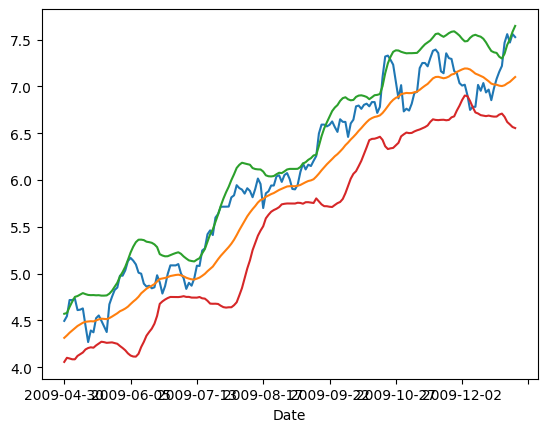

In [11]:
# Plot Features: Close, MA20, BB Upper, BB Lower
data['Close'].plot()
data['MA20'].plot()
data['BB_upper'].plot()
data['BB_lower'].plot()

<Axes: xlabel='Date'>

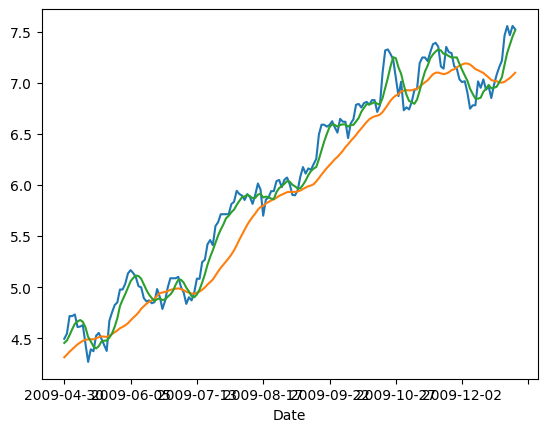

In [12]:
# Plot Features: Close, MA20, MA5
data['Close'].plot()
data['MA20'].plot()
data['MA5'].plot()

<Axes: xlabel='Date'>

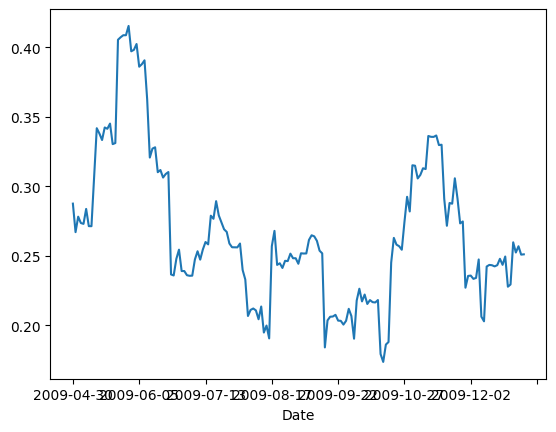

In [13]:
# Plot Features: Volatility
data['Vol20'].plot()

In [ ]:
data.to_csv('AAPL_2009-2010_6m_all_features_1d.csv')